In [2]:
# Install the required libraries
!pip install prophet

In [3]:
# Import the required libraries and dependencies
import pandas as pd
import datetime as dt
from prophet import Prophet
import hvplot.pandas
import numpy as np
%matplotlib inline

In [57]:
# Stored the data in a Pandas DataFrame
# Read the data from the gold_spot.csv file into a Pandas DataFrame
df_Gold = pd.read_csv(
    'gold_spot.csv',
    index_col='Date',
    parse_dates=True,
).dropna()

# Review the DataFrame
df_Gold.tail()

,Open,High,Low,Close
Date,,,,
2023-02-06,"1,878.00","1,894.00","1,873.20","1,879.50"
2023-02-03,"1,926.30","1,932.40","1,874.50","1,876.60"
2023-02-02,"1,967.10","1,975.20","1,925.60","1,930.80"
2023-02-01,"1,944.00","1,970.80","1,936.10","1,942.80"
2023-01-31,"1,938.60","1,946.90","1,915.50","1,945.30"


In [32]:
# Identifying Columns for better context
df_Gold.columns

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

In [33]:
# Plot the DataFrame
df_Gold.hvplot()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [58]:
# Reset the index of the DataFrame
df_Gold = df_Gold.reset_index()

In [59]:
# Making new Dataframe with only 'Date' and 'Close' Columns
df_Gold_subset = df_Gold[['Date', 'Close']]

# Make a copy of the DataFrame
df_Gold_subset = df_Gold_subset.copy()

In [60]:
# Remove commas from the 'Close' column and convert it to numeric format
df_Gold_subset['Close'] = df_Gold_subset['Close'].str.replace(',', '').astype(float)


In [61]:
# Rename the columns to names that Prophet recognizes
df_Gold_subset.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

In [82]:
# Initialize the Prophet model
model_df_Gold_subset = Prophet()

# Fit the model with your dataframe
model_df_Gold_subset.fit(df_Gold_subset)

# Create a DataFrame for future predictions
future_Gold = model_df_Gold_subset.make_future_dataframe(periods=365)  

# Use the model to make predictions
forecast_Gold = model_df_Gold_subset.predict(future_Gold)



22:43:46 - cmdstanpy - INFO - Chain [1] start processing
22:43:47 - cmdstanpy - INFO - Chain [1] done processing


In [85]:
# Showing the 25
forecast_Gold.head()



,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-01-31,1890.123721,1844.484172,1920.003247,1890.123721,1890.123721,-8.674731,-8.674731,-8.674731,-8.674731,-8.674731,-8.674731,0.0,0.0,0.0,1881.448990
1,2023-02-01,1889.294004,1843.874022,1917.221467,1889.294004,1889.294004,-9.503887,-9.503887,-9.503887,-9.503887,-9.503887,-9.503887,0.0,0.0,0.0,1879.790118
2,2023-02-02,1888.464288,1838.684879,1917.879457,1888.464288,1888.464288,-9.299036,-9.299036,-9.299036,-9.299036,-9.299036,-9.299036,0.0,0.0,0.0,1879.165252
3,2023-02-03,1887.634572,1841.123059,1916.404756,1887.634572,1887.634572,-9.504996,-9.504996,-9.504996,-9.504996,-9.504996,-9.504996,0.0,0.0,0.0,1878.129576
4,2023-02-06,1885.145423,1834.258738,1911.187084,1885.145423,1885.145423,-12.472480,-12.472480,-12.472480,-12.472480,-12.472480,-12.472480,0.0,0.0,0.0,1872.672943


In [87]:
# Save the DataFrame to a CSV file to use in a correlation dataset
forecast_Gold.to_csv('forecast_gold_subset.csv', index=False)

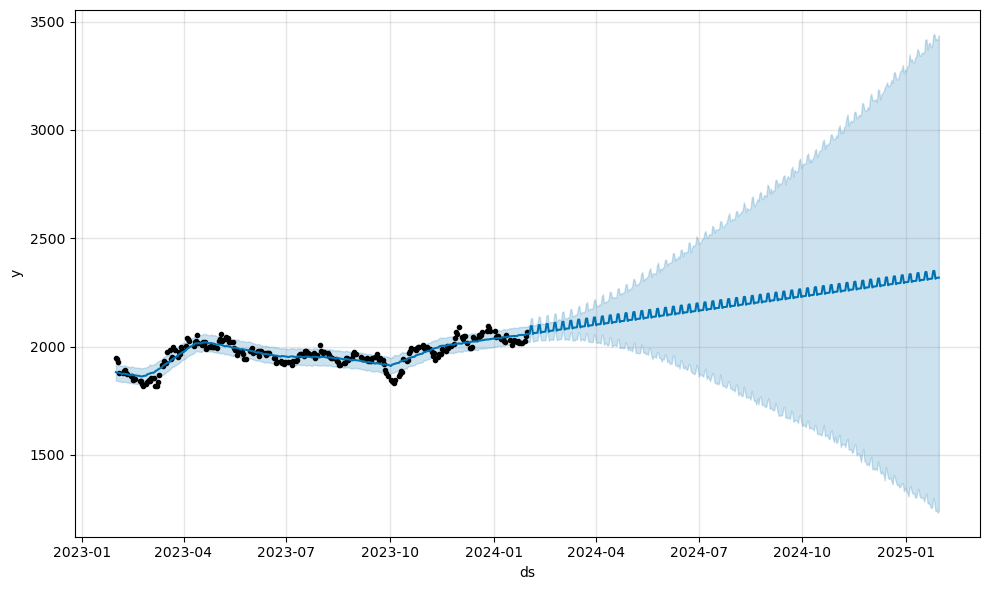

In [64]:
# Plotted the Prophet predictions for the forecast_Gold data
figures = model_df_Gold_subset.plot(forecast_Gold)

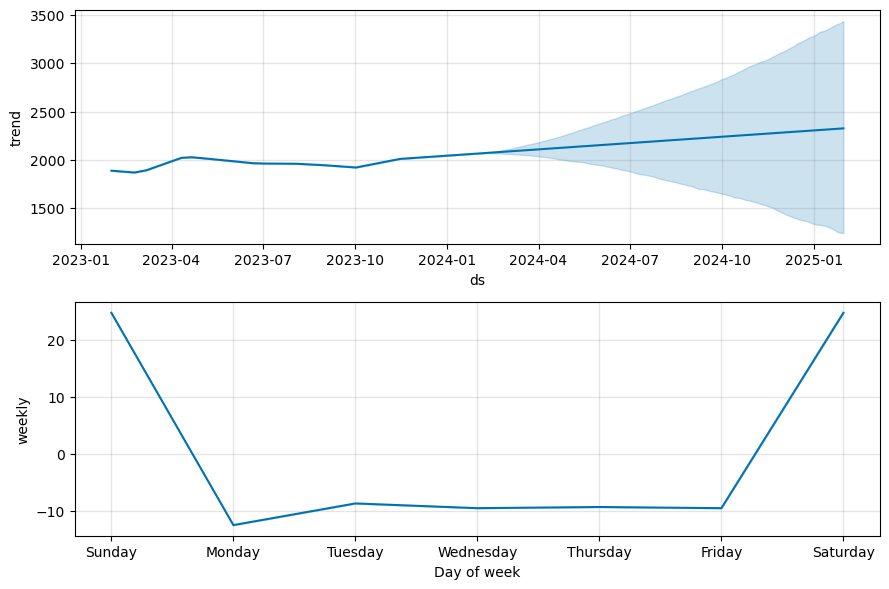

In [65]:
# Displayed plot components for the prediction chart
figures = model_df_Gold_subset.plot_components(forecast_Gold)

In [79]:
# Indexed the Date ('ds') column
forecast_Gold = forecast_Gold.set_index(["ds"])
forecast_Gold.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
2023-01-31,1890.123721,1842.891892,1917.638344,1890.123721,1890.123721,-8.674731,-8.674731,-8.674731,-8.674731,-8.674731,-8.674731,0.0,0.0,0.0,1881.448990
2023-02-01,1889.294004,1841.206213,1918.660143,1889.294004,1889.294004,-9.503887,-9.503887,-9.503887,-9.503887,-9.503887,-9.503887,0.0,0.0,0.0,1879.790118
2023-02-02,1888.464288,1840.096806,1915.049660,1888.464288,1888.464288,-9.299036,-9.299036,-9.299036,-9.299036,-9.299036,-9.299036,0.0,0.0,0.0,1879.165252
2023-02-03,1887.634572,1842.107696,1916.379113,1887.634572,1887.634572,-9.504996,-9.504996,-9.504996,-9.504996,-9.504996,-9.504996,0.0,0.0,0.0,1878.129576
2023-02-06,1885.145423,1836.079102,1913.689747,1885.145423,1885.145423,-12.472480,-12.472480,-12.472480,-12.472480,-12.472480,-12.472480,0.0,0.0,0.0,1872.672943


<Axes: xlabel='ds'>

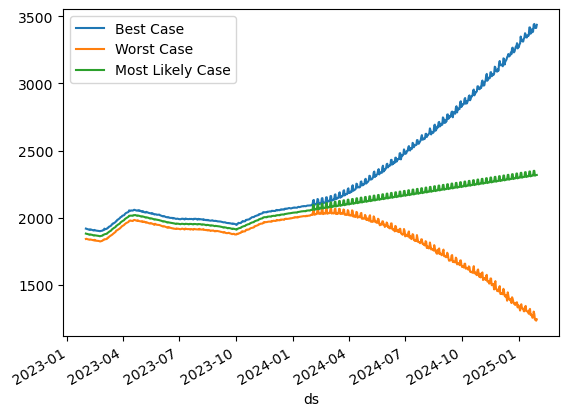

In [67]:
# Replace the column names for better context
forecast_Gold = forecast_Gold.rename(
    columns={
        "yhat_upper": "Best Case",
        "yhat_lower": "Worst Case", 
        "yhat": "Most Likely Case"
    }
)

forecast_Gold[["Best Case", "Worst Case", "Most Likely Case"]].plot()

In [68]:
forecast_Gold[["Best Case", "Worst Case", "Most Likely Case"]].mean()

Best Case           2385.088171
Worst Case          1827.319843
Most Likely Case    2102.774082
dtype: float64

In [70]:
# Selecting only the specified columns
forecast_Gold_Subset = forecast_Gold[["Best Case", "Worst Case", "Most Likely Case"]]

forecast_Gold_Subset.tail()

,Best Case,Worst Case,Most Likely Case
ds,,,
2025-01-26,3442.791964,1283.206317,2349.195856
2025-01-27,3415.274347,1240.592551,2312.709243
2025-01-28,3420.806504,1245.425936,2317.220439
2025-01-29,3412.929208,1232.644837,2317.104730
2025-01-30,3436.508829,1242.788249,2318.023027


In [73]:
forecast_Gold_Subset.reset_index(inplace=True)

In [74]:
forecast_Gold_Subset.columns

Index(['index', 'Best Case', 'Worst Case', 'Most Likely Case'], dtype='object')

In [75]:
forecast_Gold_Subset.head()

,index,Best Case,Worst Case,Most Likely Case
0,0,1918.726118,1841.637450,1881.448990
1,1,1917.791713,1843.251769,1879.790118
2,2,1914.879291,1840.146487,1879.165252
3,3,1914.401429,1839.627917,1878.129576
4,4,1909.003789,1835.276021,1872.672943
